In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')

In [88]:
df = pd.read_csv('diabetes.csv')

In [89]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [90]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [91]:
def check_constraints(row):
    # Glucose constraint: 0 < Glucose < 200
    if row['Glucose'] < 0 or row['Glucose'] > 200:
        return -1

    # Insulin constraint: 0 < Insulin < 900
    if row['Insulin'] < 0 or row['Insulin'] > 900:
        return -1

    #Blood pressure constraint: should be < 180 
    if row['BloodPressure'] > 180:
        return -1
        
    #DiabetesPedigreeFunction constraint: cant be > 2.5
    if row['DiabetesPedigreeFunction'] > 2.5:
        return -1
        
    #DiabetesPedigreeFunction constraint: If age >60, DiabetesPedigreeFunction < 2
    if row['Age'] > 60 and row['DiabetesPedigreeFunction'] > 2:
        return -1
        
    #Outcome constraint: should be either 1 or 0
    if row['Outcome'] not in [0, 1]:
        return -1

    # If all constraints are satisfied, return True
    return 1

In [92]:
# Apply the constraint check to each row
df['valid'] = df.apply(check_constraints, axis=1)

# Show rows that fail the constraints
invalid_rows = df[df['valid'] == -1]
invalid_rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,valid


In [93]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a copy of the dataset and randomly mutate 1% of the rows
df_mutated = df.copy()
num_mutations = int(0.01 * len(df))  # Mutate 1% of rows
mutation_indices = np.random.choice(df.index, size=num_mutations, replace=False)

# Mutate by adding large random values to 'Glucose' 
df_mutated.loc[mutation_indices, 'Glucose'] = np.random.uniform(250, 300, size=num_mutations)

# Ground truth: Now, we assume the mutated rows are invalid (-1), others are valid (1)
y_true = np.ones(len(df), dtype=int)  # Default all rows as valid (1)
y_true[mutation_indices] = -1         # Mark mutated rows as invalid (-1)

# Predictions: Based on our constraint checks
y_pred = df_mutated.apply(check_constraints, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [94]:
# Print the first 20 ground truth labels
print(y_true[:20])

# Print the first 20 predicted labels
print(y_pred[:20])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
dtype: int64


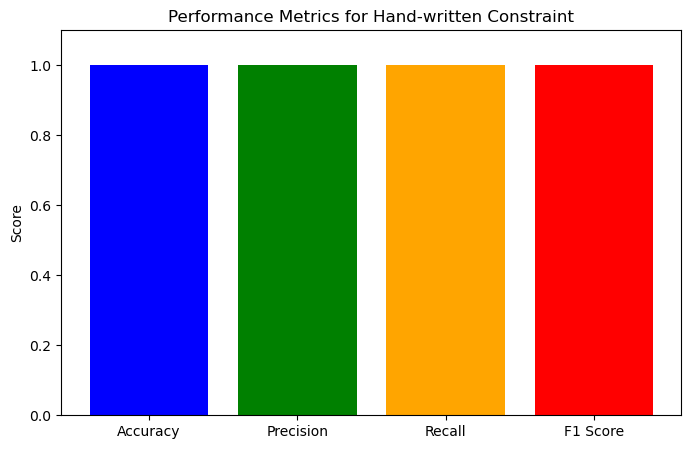

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Plot the metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1.1)  # Set y-axis limits from 0 to 1.1
plt.title('Performance Metrics for Hand-written Constraint')
plt.ylabel('Score')
plt.show()

Unique values in y_true: [-1  1]
Unique values in y_pred: [-1  1]


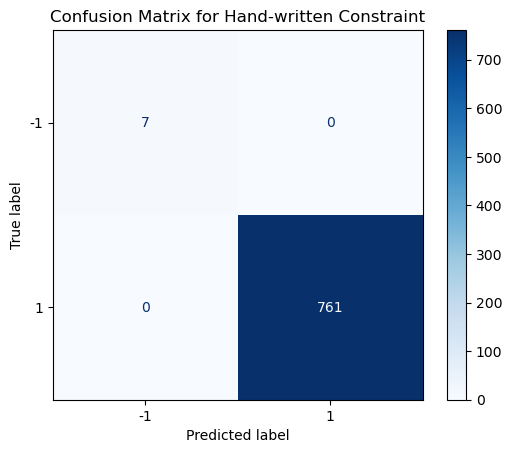

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Check the unique values in y_true and y_pred
print(f"Unique values in y_true: {np.unique(y_true)}")
print(f"Unique values in y_pred: {np.unique(y_pred)}")

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Handle case where only one class is present
if len(np.unique(y_true)) == 1 or len(np.unique(y_pred)) == 1:
    # Only one class in ground truth or predictions
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
else:
    # Both classes are present
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 1])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Hand-written Constraint')
plt.show()